In [2]:
import pandas as pd
import numpy as np

In [9]:
data_wc_matches =  pd.read_csv("../databases/WorldCupMatches.csv")

In [10]:
#selecionamos as colunas de interesse
data_wc_matches=data_wc_matches[['Datetime', 'Home Team Goals', 'Away Team Goals']]
data_wc_matches

,Datetime,Home Team Goals,Away Team Goals
0,13 Jul 1930 - 15:00,4.0,1.0
1,13 Jul 1930 - 15:00,3.0,0.0
2,14 Jul 1930 - 12:45,2.0,1.0
3,14 Jul 1930 - 14:50,3.0,1.0
4,15 Jul 1930 - 16:00,1.0,0.0
...,...,...,...
4567,NaN,NaN,NaN
4568,NaN,NaN,NaN
4569,NaN,NaN,NaN
4570,NaN,NaN,NaN


In [11]:
data_wc_matches = data_wc_matches.dropna()

# Copia de data_wc_matches para evitar warning
data_wc_matches_copy = data_wc_matches.copy()

# Mudanças desejadas
data_wc_matches_copy['Horas'] = data_wc_matches_copy['Datetime'].str[14:]
data_wc_matches_copy['Horas'] = data_wc_matches_copy['Horas'].str.strip()
data_wc_matches_copy.drop(columns=['Datetime'], inplace=True)
data_wc_matches_copy['Total Goals Match'] = data_wc_matches_copy['Home Team Goals'] + data_wc_matches_copy['Away Team Goals']

# Agrupar por Hora para sabermos se a hora é impactante
grouped_data = data_wc_matches_copy.groupby('Horas').agg({'Total Goals Match': ['mean', 'count']})


In [12]:
#observamos que existem horários com pouquissímas partidas
print(grouped_data)

      Total Goals Match      
                   mean count
Horas                        
11:30          2.000000     1
12:00          2.920000    50
12:30          2.214286    14
12:45          3.500000     2
12:50          1.000000     1
13:00          2.218750    32
13:30          2.636364    11
13:45          2.307692    13
14:00          1.500000     2
14:15          6.000000     1
14:30          2.588235    17
14:45          4.800000     5
14:50          4.000000     2
15:00          3.253521    71
15:10          4.000000     1
15:30          2.458333    24
15:40          3.000000     1
16:00          2.496063   127
16:30          3.115385    26
16:45          3.066667    15
16:50          9.000000     2
17:00          2.986842    76
17:10          3.500000     2
17:15          2.826087    23
17:30          3.000000    15
17:45          2.000000     1
17:50          3.000000     1
18:00          3.577778    45
18:10          8.000000     1
18:30          2.500000     2
19:00     

In [24]:
#retiramos os horários com poucas partidas a fim de evitar conclusões utilizando uma amostragem pequena
filtered_grouped_data = grouped_data[grouped_data[('Total Goals Match', 'count')] >= 10]
filtered_grouped_data.columns = ['Mean_Total_Goals', 'Count']

In [25]:
filtered_grouped_data

,Mean_Total_Goals,Count
Horas,,
12:00,2.920000,50
12:30,2.214286,14
13:00,2.218750,32
13:30,2.636364,11
13:45,2.307692,13
14:30,2.588235,17
15:00,3.253521,71
15:30,2.458333,24
16:00,2.496063,127


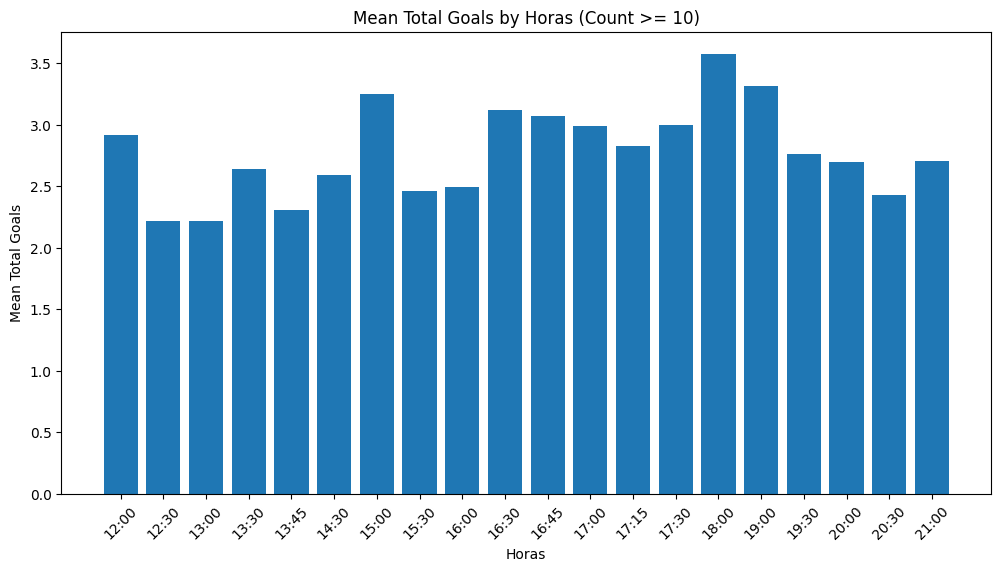

In [15]:
#Visualização do groupby
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(filtered_grouped_data.index, filtered_grouped_data['Mean_Total_Goals'])
plt.xlabel('Horas')
plt.ylabel('Mean Total Goals')
plt.title('Mean Total Goals by Horas (Count >= 10)')
plt.xticks(rotation=45)
plt.show()

In [16]:
data_wc_matches_copy

,Home Team Goals,Away Team Goals,Horas,Total Goals Match
0,4.0,1.0,15:00,5.0
1,3.0,0.0,15:00,3.0
2,2.0,1.0,12:45,3.0
3,3.0,1.0,14:50,4.0
4,1.0,0.0,16:00,1.0
...,...,...,...,...
847,0.0,0.0,17:00,0.0
848,1.0,7.0,17:00,8.0
849,0.0,0.0,17:00,0.0
850,0.0,3.0,17:00,3.0


In [26]:
#Transformando Horas em Minutos para facilitar a regressão
data_wc_matches_copy = data_wc_matches_copy.copy()
data_wc_matches_copy.loc[:, 'Horas_minutos'] = data_wc_matches_copy['Horas'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))


In [27]:
data_wc_matches_copy

,Home Team Goals,Away Team Goals,Horas,Total Goals Match,Horas_minutos,const
0,4.0,1.0,15:00,5.0,900,1
1,3.0,0.0,15:00,3.0,900,1
2,2.0,1.0,12:45,3.0,765,1
3,3.0,1.0,14:50,4.0,890,1
4,1.0,0.0,16:00,1.0,960,1
...,...,...,...,...,...,...
847,0.0,0.0,17:00,0.0,1020,1
848,1.0,7.0,17:00,8.0,1020,1
849,0.0,0.0,17:00,0.0,1020,1
850,0.0,3.0,17:00,3.0,1020,1


In [28]:
#Regressão
import pandas as pd
import statsmodels.api as sm


# Adicionamos a constante para a Regressão
data_wc_matches_copy['const'] = 1

# Variável dependente Quantidade de Gols
# Variável independete Horário
y = data_wc_matches_copy['Total Goals Match']
X = data_wc_matches_copy[['const', 'Horas_minutos']]

# Perform the regression
model = sm.OLS(y, X)
results = model.fit()

# Print the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      Total Goals Match   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01358
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.907
Time:                        14:18:25   Log-Likelihood:                -1779.3
No. Observations:                 852   AIC:                             3563.
Df Residuals:                     850   BIC:                             3572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7838      0.430      6.475

Depois do resultado não esperado, analisei mais profundamente a correlação dos dados


In [21]:
#Correlação praticamente nula, ou seja, não seria possível prever de acordo com o horário, pois o horário não impacta da forma que esperávamos
correlation = data_wc_matches_copy['Total Goals Match'].corr(data_wc_matches_copy['Horas_minutos'])
print(f"A correlação de Pearson é {correlation}")

A correlação de Pearson é 0.003996477032925569


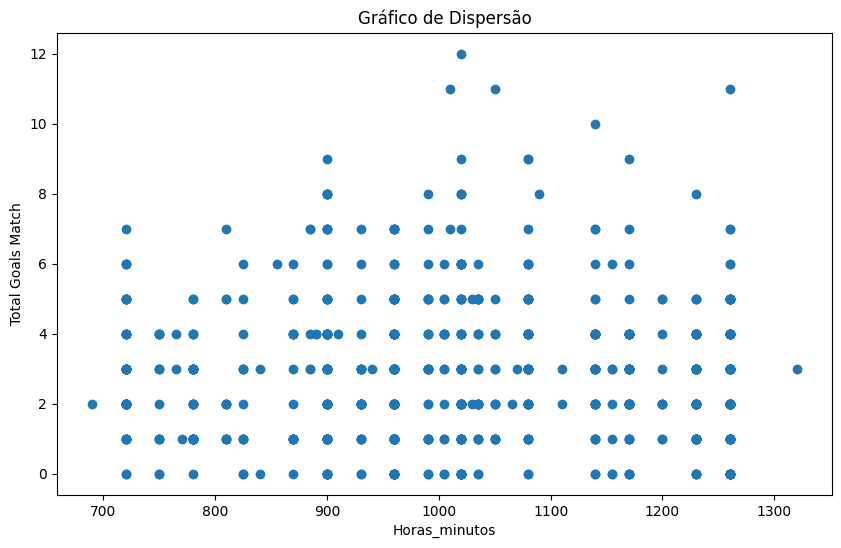

In [22]:
#Para confirmar que não existre uma correlação não linear que a correlação dee Pearson não apresentou plotei os dados em uim gráfico de dispersão e realmente não há correlação
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(data_wc_matches_copy['Horas_minutos'], data_wc_matches_copy['Total Goals Match'])
plt.title('Gráfico de Dispersão')
plt.xlabel('Horas_minutos')
plt.ylabel('Total Goals Match')
plt.show()